<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - KMeans & DBScan - Location
</b></font> </br></p>

---


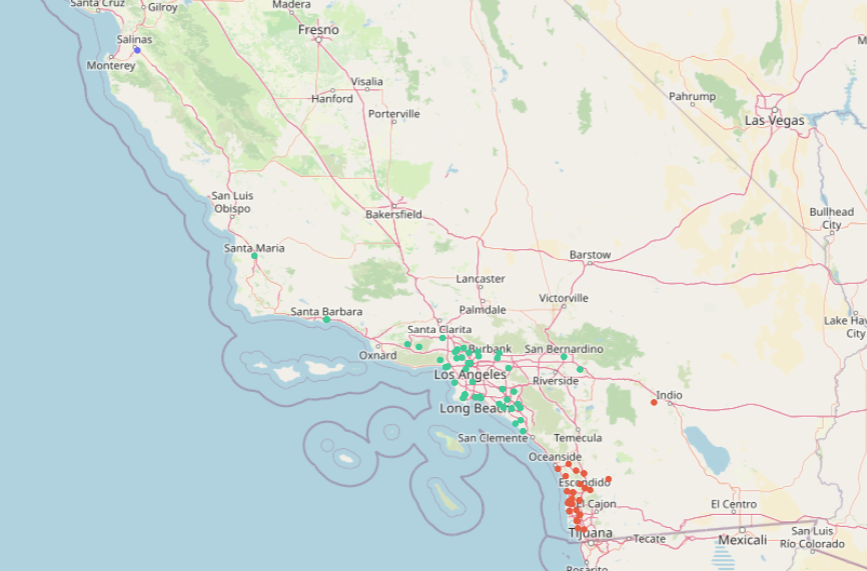

# **1 <font color='orange'>|</font>  Understand**

---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Auf Basis von Geodaten kann ein Clustering erfolgen.




<p><font color='black' size="5">
Daten laden
</font></p>



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px

filename = '/content/location_data.csv'
data = pd.read_csv(filename, encoding = "ISO-8859-1")
data = data[data.region == 'California']
data.reset_index(inplace=True)

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

# **2 <font color='orange'>|</font> Prepare**

---

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>


<p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(data[['Lat', 'Long']])

In [ ]:
model_dbscan = DBSCAN(eps=0.5, min_samples=5)
model_dbscan.fit(data[['Lat', 'Long']])

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Silhouettenkoeffizient
</font></p>

In [ ]:
 from sklearn.metrics import silhouette_score
 s_score_kmeans = silhouette_score(data[['Lat', 'Long']], model_kmeans.labels_, metric='euclidean')
 print(f'Silhouettenkoeffizient KMeans: {s_score_kmeans:0.2f}')

 # ---

 s_score_dbscan = silhouette_score(data[['Lat', 'Long']], model_dbscan.labels_, metric='euclidean')
 print(f'Silhouettenkoeffizient DBScan: {s_score_dbscan:0.2f}')

<p><font color='black' size="5">
Aufbau Datenwürfel für Visualisierung
</font></p>

In [ ]:
data['KMeans'] = pd.DataFrame(model_kmeans.labels_).astype('string')
data['DBScan'] = pd.DataFrame(model_dbscan.labels_).astype('string')

<p><font color='black' size="5">
Visualisierung KMeans
</font></p>

In [ ]:
fig = px.scatter_mapbox(data, lat="Lat", lon="Long", color="KMeans", zoom=5, width=1200, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMean Clustering")
fig.show()

<p><font color='black' size="5">
Visualisierung DBScan
</font></p>

In [ ]:
fig = px.scatter_mapbox(data, lat="Lat", lon="Long", color="DBScan", zoom=5, width=1200, height=600)

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(title=f"DBSCAN Clustering")
fig.show()

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>